In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'

import seaborn as sns

from sklearn.datasets import load_diabetes

In [44]:
import warnings
warnings.filterwarnings(action='ignore') 

- 당뇨 환자의 1년 후 병이 진전된 정도 예측

In [2]:
df = load_diabetes()

In [3]:
X = df.data
y = df.target

In [5]:
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

In [7]:
df.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [10]:
dia = pd.concat([X_df, y_df], axis=1)

In [11]:
dia.head()

,0,1,2,3,4,5,6,7,8,9,0
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [13]:
dia.columns = np.append(df.feature_names, 'heal')

In [15]:
dia.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,heal
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [16]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  heal    442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [19]:
dia['sex'].unique()

array([ 0.05068012, -0.04464164])

### Q. 왜 성별이 0.05 / -0.04 두 값일까? 
- 보통이면 0/1일텐데, 여기선 변수값들이 스케일링되었기 때문에 실수로 나온다.

## target 값 분포 확인

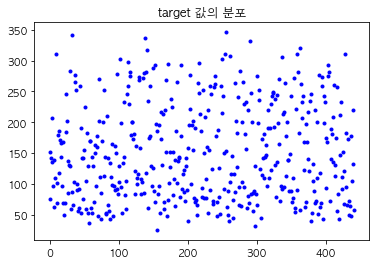

In [50]:
plt.plot(dia['heal'], 'b.')
plt.title('target 값의 분포')
plt.show()

# 상관관계

In [25]:
dia.corr()[['heal']].sort_values(by='heal', ascending=False)

,heal
heal,1.000000
bmi,0.586450
s5,0.565883
bp,0.441484
s4,0.430453
s6,0.382483
s1,0.212022
age,0.187889
s2,0.174054
sex,0.043062


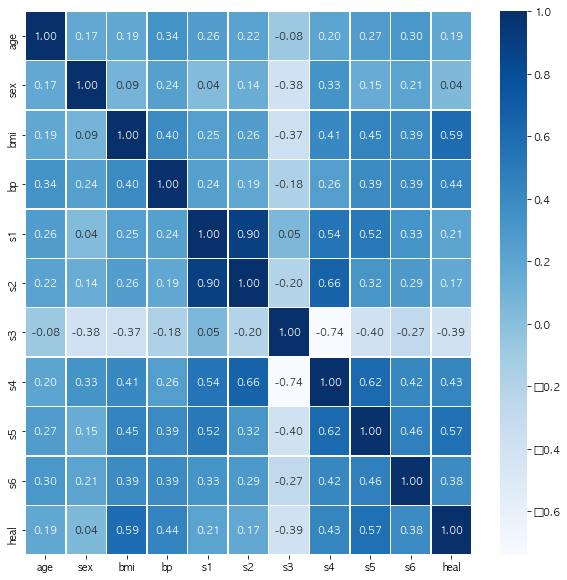

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(data = dia.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

## 변수 - heal 시각화

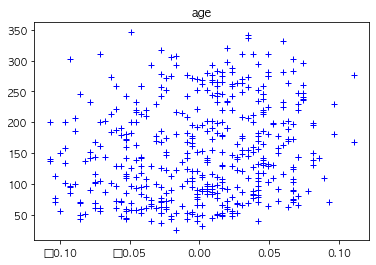

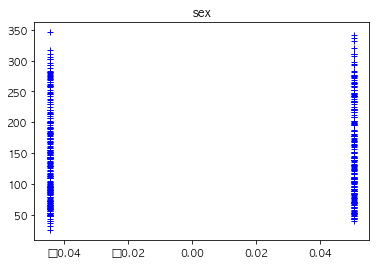

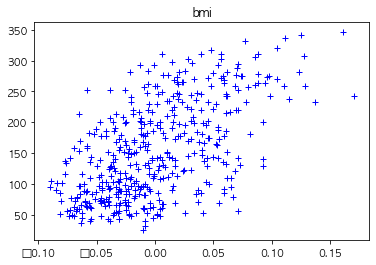

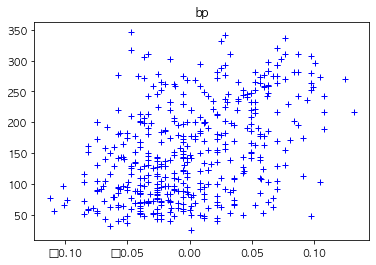

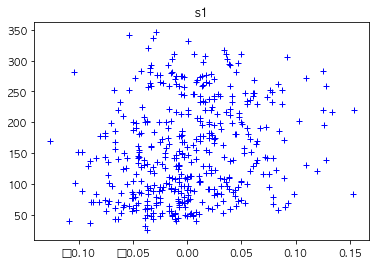

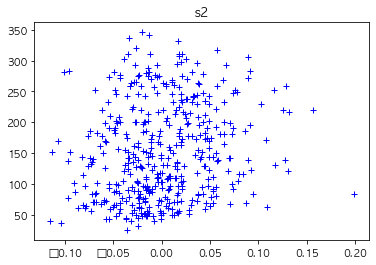

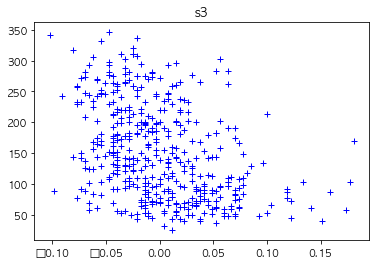

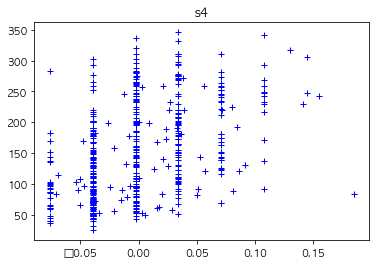

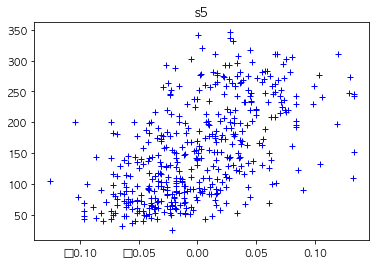

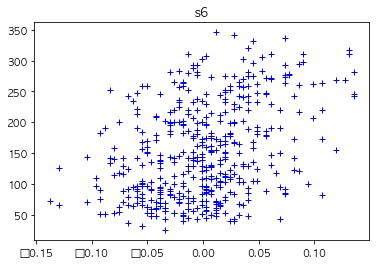

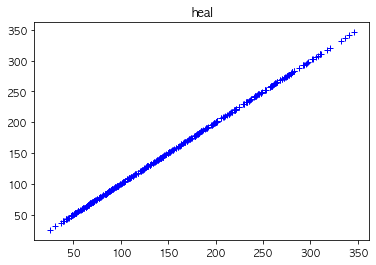

In [48]:
for i in dia.columns:
    plt.plot(dia['%s'%i], dia['heal'], 'b+')
    plt.title('%s'%i)
    plt.show()

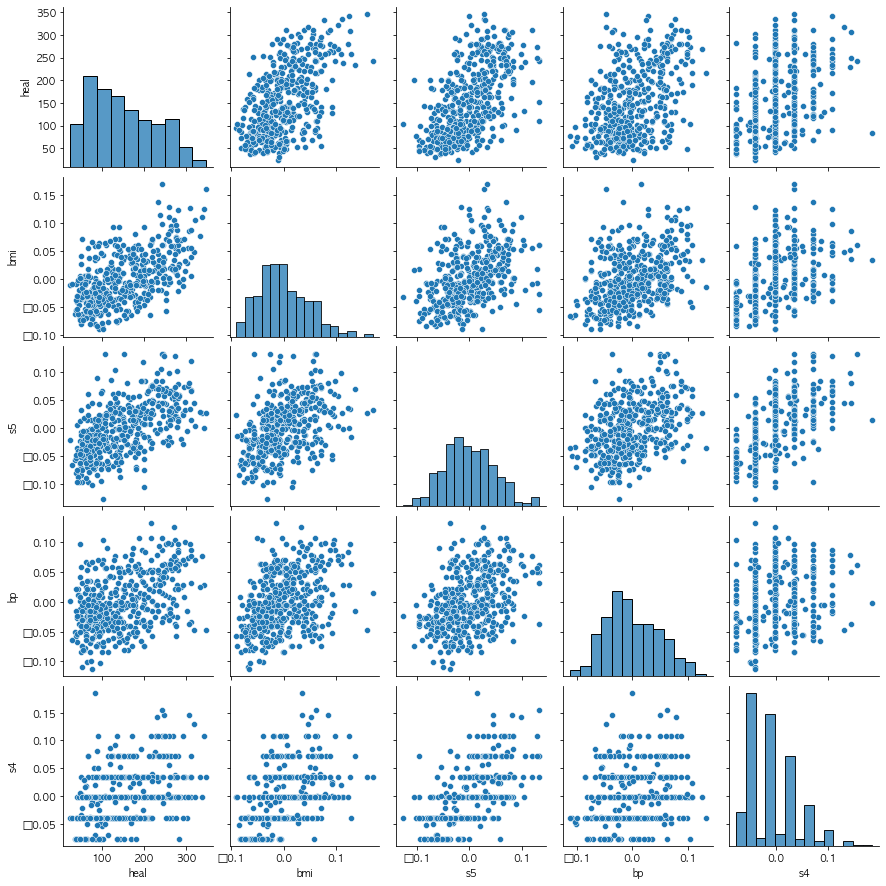

In [45]:
sns.pairplot(dia[['heal','bmi','s5','bp','s4']])
plt.show()

* 참고로, 변수를 정할 떄 대괄호를 두개 써주어야 에러가 안난다
> #### 1. bmi, s5, bp는 heal과의 관계가 우상향 하는 성향을 보인다. 
> #### 2. s4는 뭔가 계층으로 나뉜 느낌이다. 더 자세히 알아보아야겠다.

## s4 탐색

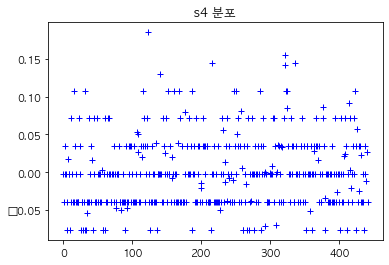

In [41]:
plt.plot(dia['s4'], 'b+')
plt.title('s4 분포')
plt.show()

In [35]:
dia['s4'].nunique(), len(dia)

(66, 442)

> #### 총 데이터(행)의 개수가 442개인데, s4의 값 종류는 66개이다. 그래서 그래프로 그렸을 때 일직선의 모양이 그려졌던 것 같다.